In [9]:
!ls /project/projectdirs/desi/target/analysis/truth/dr3.1/trimmed/cesam_vvds_spF22_WIDE_Full-trim.fits

/project/projectdirs/desi/target/analysis/truth/dr3.1/trimmed/cesam_vvds_spF22_WIDE_Full-trim.fits


In [27]:
!ls /project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/*deep2*

/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/decals-dr3.1-deep2-field2.fits
/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/decals-dr3.1-deep2-field3.fits
/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/decals-dr3.1-deep2-field4.fits
/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/deep2-field1.fits.gz
/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/deep2-field2.fits.gz
/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/deep2-field3.fits.gz
/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/deep2-field4.fits.gz


In [86]:
dat2.columns

ColDefs(
    name = 'FIELD'; format = 'I'
    name = 'SUBFIELD'; format = 'I'
    name = 'OBJNO'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'B'; format = 'E'
    name = 'R'; format = 'E'
    name = 'I'; format = 'E'
    name = 'BERR'; format = 'E'
    name = 'RERR'; format = 'E'
    name = 'IERR'; format = 'E'
    name = 'PGAL'; format = 'E'
    name = 'RG'; format = 'E'
    name = 'BADFLAG'; format = 'B'
    name = 'ZHELIO'; format = 'E'
    name = 'ZHELIO_ERR'; format = 'E'
    name = 'ZQUALITY'; format = 'I'
    name = 'SFD_EBV'; format = 'E'
    name = 'SOURCE'; format = '12A'
    name = 'MASK_WEIGHT'; format = 'E'
    name = 'OBJ_WEIGHT'; format = 'E'
    name = 'SELECT_WEIGHT'; format = 'E'
    name = 'PHOT_WEIGHT'; format = 'E'
    name = 'TARG_WEIGHT'; format = 'E'
    name = 'ZSUCCESS_WEIGHT'; format = 'E'
    name = 'FINAL_WEIGHT'; format = 'E'
    name = 'KRON_RADIUS_HI'; format = 'E'
    name = 'KRON_RADIUS_LOW'; format = 'E'
    n

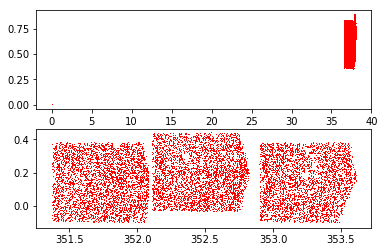

In [94]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
#deep2-dr3
#dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sgc_elg_like.fits')
dat1 = fits.getdata('/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/decals-dr3.1-deep2-field3.fits')
dat2 = fits.getdata('/project/projectdirs/desi/target/analysis/truth/dr3.1/allmatches/decals-dr3.1-deep2-field4.fits')
dat = np.hstack((dat1,dat2))
plt.subplot(2,1,1)
sel = (dat['RA']>50)
plt.plot(dat2['RA'],dat2['DEC'],'r,')
#deep2
deep2 = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/DEEP2/zcat.deep2.dr4.fits')
plt.subplot(2,1,2)
sel = (deep2['dec']>-1)&(deep2['dec']<1)&(deep2['ra']>300)
plt.plot(deep2['ra'][sel],deep2['dec'][sel],'r,')

In [95]:
from astropy.table import Table
def ELG_selection_for_dr3_like(tractor,region='sgc'):
    import numpy as n
    value_g=tractor['DECAM_DEPTH'][:,1]
    value_r=tractor['DECAM_DEPTH'][:,2]
    value_z=tractor['DECAM_DEPTH'][:,4]
    gL = 62.79716079 
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75  
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)
    
    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,1] / tractor['DECAM_MW_TRANSMISSION'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,2] / tractor['DECAM_MW_TRANSMISSION'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['DECAM_FLUX'][:,4] / tractor['DECAM_MW_TRANSMISSION'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.625)&(g<23.025)&(-0.068*rz+0.257<gr)&(gr< 0.112*rz+0.973) &(0.218*gr+0.371<rz)&(rz<-0.555*gr+2.101)
    color_ngc = (g>21.625)&(g<23.1)  &(-0.068*rz+0.257<gr)&(gr< 0.112*rz+0.973) &(0.637*gr+0.199<rz)&(rz<-0.555*gr+2.101)
    # final selection boolean array :
    selection_sgc =(color_sgc)&(depth_selection_sgc)
    selection_ngc =(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, Table(tractor[selection_sgc.astype(bool)])
        else:
            flag = False
            return flag, Table(tractor[selection_sgc.astype(bool)])
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, Table(tractor[selection_ngc.astype(bool)])
            else:
                flag = False
                return flag, Table(tractor[selection_ngc.astype(bool)]) 
flag,dr3_elg_like = ELG_selection_for_dr3_like(dat)            

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in true_divide
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipyker

In [96]:
#sel = (dat['ra']>351.)&(dat['ra']<354)&(dat['dec']>-0.2)&(dat['dec']<0.5)
len(dr3_elg_like)

852

In [64]:
dr3_vvds_matched = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/VVDS/dr3_vvds_matched.fits')


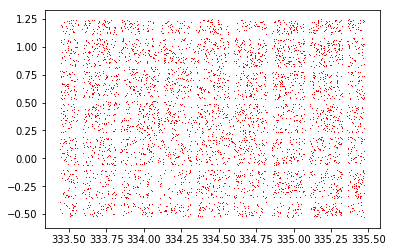

In [23]:
plt.plot(dr3_vvds_matched['ra'],dr3_vvds_matched['dec'],'r,')

In [60]:
dr3_vvds_matched.columns

ColDefs(
    name = 'BRICKID'; format = 'J'
    name = 'BRICKNAME'; format = '8A'
    name = 'OBJID'; format = 'J'
    name = 'TYPE'; format = '4A'
    name = 'RA'; format = 'D'
    name = 'RA_IVAR'; format = 'E'
    name = 'DEC'; format = 'D'
    name = 'DEC_IVAR'; format = 'E'
    name = 'DECAM_FLUX'; format = '6E'
    name = 'DECAM_FLUX_IVAR'; format = '6E'
    name = 'DECAM_MW_TRANSMISSION'; format = '6E'
    name = 'DECAM_NOBS'; format = '6B'
    name = 'DECAM_RCHI2'; format = '6E'
    name = 'DECAM_PSFSIZE'; format = '6E'
    name = 'DECAM_FRACFLUX'; format = '6E'
    name = 'DECAM_FRACMASKED'; format = '6E'
    name = 'DECAM_FRACIN'; format = '6E'
    name = 'DECAM_DEPTH'; format = '6E'
    name = 'DECAM_GALDEPTH'; format = '6E'
    name = 'OUT_OF_BOUNDS'; format = 'L'
    name = 'DECAM_ANYMASK'; format = '6I'
    name = 'DECAM_ALLMASK'; format = '6I'
    name = 'WISE_FLUX'; format = '4E'
    name = 'WISE_FLUX_IVAR'; format = '4E'
    name = 'WISE_MW_TRANSMISSION'; format = '4E'